In [1]:
import sys
# !pip install numpy
# !pip install matplotlib
# !pip install torch
# !pip install pandas
# !pip install sklearn
# !pip install itertools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
import sklearn as sk
import itertools
from datetime import datetime, time
from sklearn.model_selection import train_test_split

print('imports succesfull')


imports succesfull


In [43]:
# Defining functions for later reuse

# importing data
def import_csv(data_path):
    df = pd.read_csv(data_path)
    # print(df)

    return df


def import_csv_filt(data_path : str, start_date : str, end_date : str, outlier_repl = True, plot_outliers = False) -> pd.DataFrame: 
    """ This function loads the data, filters on the given time window and filters and fills outliers with a rolling window median.  """
    
    # Defining outlier detection parameters
    window_size = 8
    outlier_thres_mm = 3
    
    # reading in data 
    df = pd.read_csv(data_path)
    
    # Filter on given dates
    df = df[(df['time'] > start_date) & (df['time'] < end_date)] 
    
    # get indexes of outliers
    outliers_idx = (df['bead_width (mm)'] - df['bead_width (mm)'].rolling(window_size, center = True).median()).abs() > outlier_thres_mm

    if plot_outliers:
        # plot
        plt.plot(df['bead_width (mm)'], label='bead width (mm)')
        plt.plot(df['bead_width (mm)'].loc[outliers_idx], '.r', label='dropped')
        plt.plot(df['bead_width (mm)'].rolling(window_size, center = True).median().loc[outliers_idx], '.y', label='replaced by')
        plt.legend()
        plt.show()
        
    
    if outlier_repl:
        # replace 
        df['bead_width (mm)'].loc[outliers_idx] = df['bead_width (mm)'].rolling(window_size, center = True).median().loc[outliers_idx]
    
    # if smoothing:
        ## smoothing
        # smooth = df_s['bead_width (mm)'].rolling(window=10, win_type='gaussian', center=True).mean(std=10)
    
    return df
    


In [44]:
# motor_values = ['Screw Torque', 'Torque%']

# for mv in motor_values:
#     plt.plot(df_filt[mv])

# plt.show()

In [45]:
# importing data
# preprocessing data
## only use those points that have e.g. t amount of time also in front of it
## get number of missing data points
## split train/test data

# train_set, test_set = train_test_split(df_m, test_size=0.2, shuffle=False)  

## do not use shuffle!! Needs to be in timely order. Or do we need to shuffle to a certain degree, whilst keeping the order
## of the previous x data points intact? Or can we do that using indexes??
## OR make new dataset using collumns for every t-1 t-2 ... t-x datapoints for HZ and RPM/torque? -> idea: better intergrateable using existing regression models. 


In [46]:
# models to be used for the regression task
# Linear Regression 
from sklearn.linear_model import LinearRegression

# Decision Trees
from sklearn.tree import DecisionTreeRegressor

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# maybe a polynomial regression? see p.129 of book. 
from sklearn.preprocessing import PolynomialFeatures

# or SVM regression? see p.162 of the book. 


In [47]:
# get a learning curve of the models! check p. 132 of book
from sklearn.metrics import mean_squared_error


In [48]:
lst = [ 60, 70, 80, 90]

for subset in itertools.combinations(range(6, 10), 2):
    print( ' '.join(str(subset)))

( 6 ,   7 )
( 6 ,   8 )
( 6 ,   9 )
( 7 ,   8 )
( 7 ,   9 )
( 8 ,   9 )


In [49]:
permus = []

for indices in itertools.permutations(lst, 2):
    print(indices)
    permus.append(indices)
    
print(permus)



(60, 70)
(60, 80)
(60, 90)
(70, 60)
(70, 80)
(70, 90)
(80, 60)
(80, 70)
(80, 90)
(90, 60)
(90, 70)
(90, 80)
[(60, 70), (60, 80), (60, 90), (70, 60), (70, 80), (70, 90), (80, 60), (80, 70), (80, 90), (90, 60), (90, 70), (90, 80)]


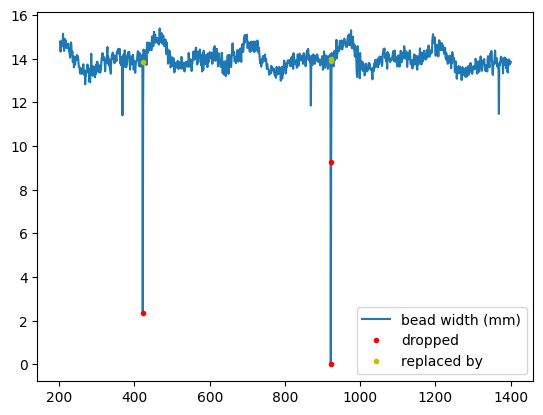

                         time  bead_width (mm)  screw_rpm (RPM)  \
202   2022-09-23 12:24:59.963            14.79             89.0   
203   2022-09-23 12:24:59.767            14.33             90.0   
204   2022-09-23 12:24:59.564            14.34             90.0   
205   2022-09-23 12:24:59.363            14.77             90.0   
206   2022-09-23 12:24:59.161            14.80             90.0   
...                       ...              ...              ...   
1397  2022-09-23 12:21:00.965            13.90             90.0   
1398  2022-09-23 12:21:00.762            13.74             90.0   
1399  2022-09-23 12:21:00.562            13.81             90.0   
1400  2022-09-23 12:21:00.364            13.81             90.0   
1401  2022-09-23 12:21:00.164            13.86             91.0   

      screw_rpm_setpoint (RPM)  screw_torque (Nm)  hz1 (°C)  \
202                       90.0               -0.0     180.0   
203                       90.0               -0.0     180.0   
204   

' \n* make function to import datasets xxxxxxxxxxxxxxxxxxxx\n* append a function to filter on date/time xxxxxxxxxxxxxxxxxxx\n* outlier detection on the average 10 datapoint or so (more dificutlt) xxxxxxxxxxxx\n* and replace those points too!! xxxxxxxxxxxxxxxxx\n* start with ML !!! \n\n\n'

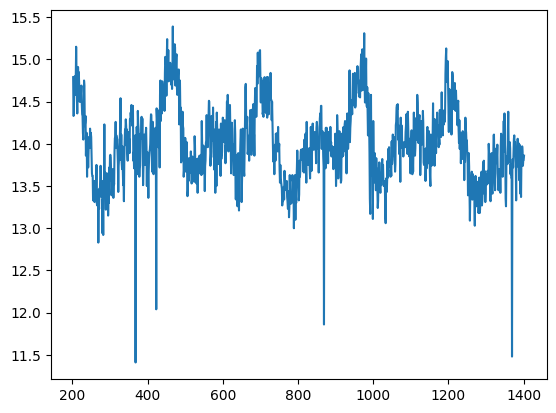

In [51]:
# loading test dataframe
test_dataset_loc = '../data/data_test_wo_rollers_23-09-12.21.00--12.25.00.csv'
df_test_wo_rollers = import_csv(test_dataset_loc) 

# defining start and end times (strings)
start_date_str = '2022-09-23 12:21:00.000'
end_date_str = '2022-09-23 12:25:00.000'
# defining start and end times in datetime (not strictly nesecairy (, yet))
start_date = datetime.strptime(start_date_str, '%Y-%m-%d %H:%M:%S.%f')
end_date = datetime.strptime(end_date_str, '%Y-%m-%d %H:%M:%S.%f')

# use function to get dataset
df_test_filt = import_csv_filt(test_dataset_loc, start_date_str, end_date_str, plot_outliers=True)

# plot
plt.plot(df_test_filt['bead_width (mm)'])

print(df_test_filt)


##### TO DO:#####
""" 
* make function to import datasets xxxxxxxxxxxxxxxxxxxx
* append a function to filter on date/time xxxxxxxxxxxxxxxxxxx
* outlier detection on the average 10 datapoint or so (more dificutlt) xxxxxxxxxxxx
* and replace those points too!! xxxxxxxxxxxxxxxxx
* start with ML !!! 


"""






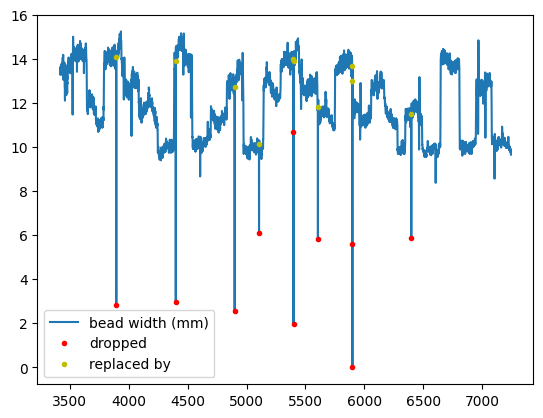

                         time  bead_width (mm)  screw_rpm (RPM)  \
3416  2022-09-23 14:17:29.824            13.34             80.0   
3417  2022-09-23 14:17:29.632            13.59             80.0   
3418  2022-09-23 14:17:29.425            13.64             80.0   
3419  2022-09-23 14:17:29.225            13.28             80.0   
3420  2022-09-23 14:17:29.026            13.56             80.0   
...                       ...              ...              ...   
7241  2022-09-23 14:04:45.814             9.85             60.0   
7242  2022-09-23 14:04:45.615             9.90             60.0   
7243  2022-09-23 14:04:45.415             9.77             60.0   
7244  2022-09-23 14:04:45.216             9.86             60.0   
7245  2022-09-23 14:04:45.024             9.66             60.0   

      screw_rpm_setpoint (RPM)  screw_torque (Nm)  hz1 (°C)  \
3416                      80.0               16.0     180.0   
3417                      80.0               16.0     180.0   
3418  

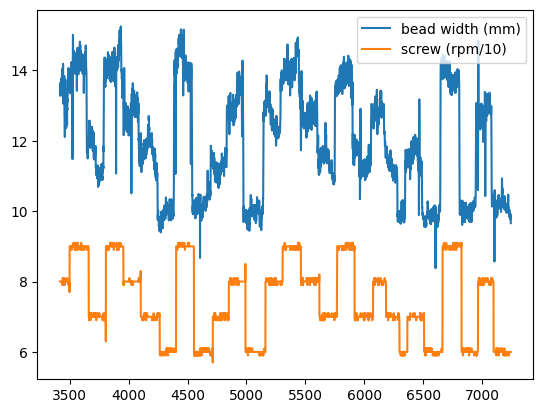

,bead_width (mm),screw_rpm (RPM),screw_rpm_setpoint (RPM),screw_torque (Nm),hz1 (°C),hz1_setpoint (°C),hz2 (°C),hz2_setpoint (°C),hz3 (°C),hz3_setpoint (°C),hz4 (°C),hz4_setpoint (°C)
count,3826.000000,3826.000000,3826.000000,3825.000000,3829.0,3829.0,3829.000000,3829.0,3829.000000,3829.0,3829.0,3829.0
mean,12.055115,74.698118,74.694198,15.551895,180.0,180.0,189.489423,190.0,199.875424,200.0,210.0,210.0
std,1.552123,11.156150,11.161233,1.123162,0.0,0.0,0.499953,0.0,0.330280,0.0,0.0,0.0
min,8.380000,57.000000,60.000000,10.000000,180.0,180.0,189.000000,190.0,199.000000,200.0,210.0,210.0
25%,10.470000,61.000000,60.000000,15.000000,180.0,180.0,189.000000,190.0,200.000000,200.0,210.0,210.0
50%,11.990000,71.000000,70.000000,16.000000,180.0,180.0,189.000000,190.0,200.000000,200.0,210.0,210.0
75%,13.507500,81.000000,80.000000,16.000000,180.0,180.0,190.000000,190.0,200.000000,200.0,210.0,210.0
max,15.250000,91.000000,90.000000,19.000000,180.0,180.0,190.000000,190.0,200.000000,200.0,210.0,210.0


In [55]:
# Defining import variables, _s stands for small 
loc_s = '../data/dataset_small_23-09_14.04.45-14.17.30.csv'
start_s = '2022-09-23 14:04:45.000'
end_s = '2022-09-23 14:17:30.000'

# import, filter and outlier replacement
df_s = import_csv_filt(loc_s, start_s, end_s, plot_outliers=True)
print(df_s)

plt.plot(df_s['bead_width (mm)'], label='bead width (mm)')
plt.plot(df_s['screw_rpm (RPM)']/10, label='screw (rpm/10)')
plt.legend()
plt.show()

df_s.describe()


